<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCKProject_Balanced_08_Tunnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification: Primary work

##Connecting to drive & importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [ ]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [ ]:
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [ ]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


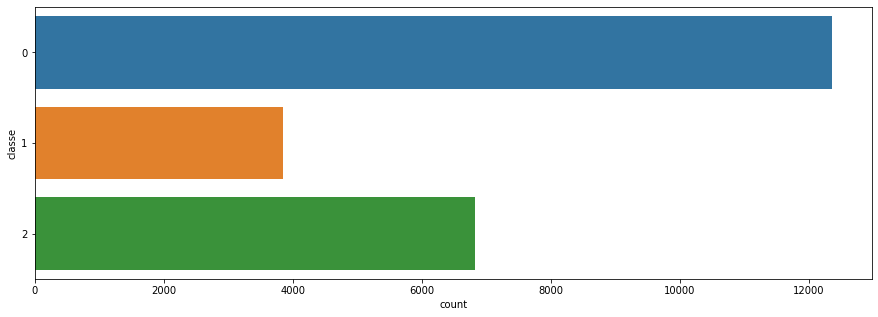

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


2/ NLP Data Preparations: Data Balancing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = data['commentaire']
labels = data['classe']

labels = [int(i) for i in labels]

In [ ]:
i=0
c=0
Nlables=[]
Nsentences=[]

while (c<5500):
  if (labels[i]!= 0):
    Nlables.append(labels[i])
    Nsentences.append(sentences[i])
  else:
    c+=1
  i+=1
while (i<len(labels)):
  Nlables.append(labels[i])
  Nsentences.append(sentences[i])
  i+=1

sentences=[str(i) for i in sentences]

i=0
c=0

while (c<3000):
  if (Nlables[i]==1):
    Nlables.append(Nlables[i])
    Nsentences.append(Nsentences[i])
    c+=1
  i+=1

In [ ]:
import pandas as pd

data=[[i,j] for i,j in zip(Nsentences , Nlables)]

data=pd.DataFrame(data,columns=["sentences","classe"])

data

,sentences,classe
0,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
1,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
2,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
3,أنت أزاي لبؤة كدة ؟,1
4,دول عبيد باسم !! انت ما تعرفش غير ستات كده يعن...,2
...,...,...
20528,انت حمار وابن حمار وابن ابن حمار,1
20529,يلعن روحك يا هنية على هالتصريح الصرّحتو,1
20530,بيكفيكن عهر,1
20531,كل عمري إسمع عن أعور الدجيل و حمار,1


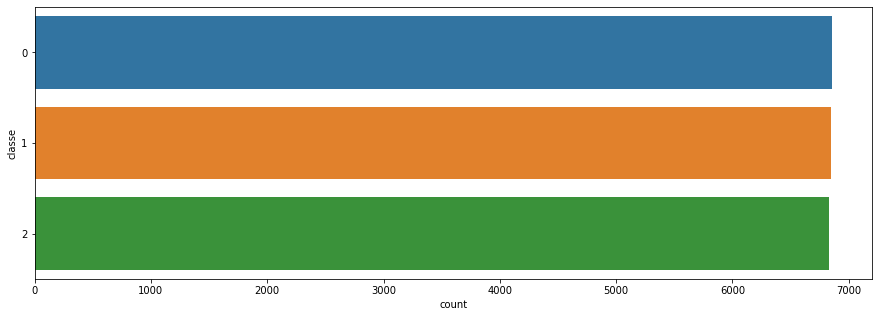

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
#Figure out the longest comment

def count_words(input):
  return len(input.split())
max_length=count_words(max(Nsentences,key=count_words))
max_length

207

#Importing extra data

In [ ]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")
data5=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/D5.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


data5['classe']=data5['classe'].replace("hate", int(2))
data5['classe']=data5['classe'].replace("normal", int(0)) 
data5['classe']=data5['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
C3=data5["commentaire"]
L1=data12["classe"]
L2=data34["classe"]
L3=data5["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]
data5=[[i,j] for i,j in zip(C3 , L3)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])
data5=pd.DataFrame(data5,columns=["sentences","classe"])

In [ ]:
data5["sentences"]=data5["sentences"].str.replace("_"," ")

In [ ]:
data5["sentences"][1097]

'"#أزهى عصور المسخره  هل ضيعت "شيما" محافظ بورسعيد؟"'

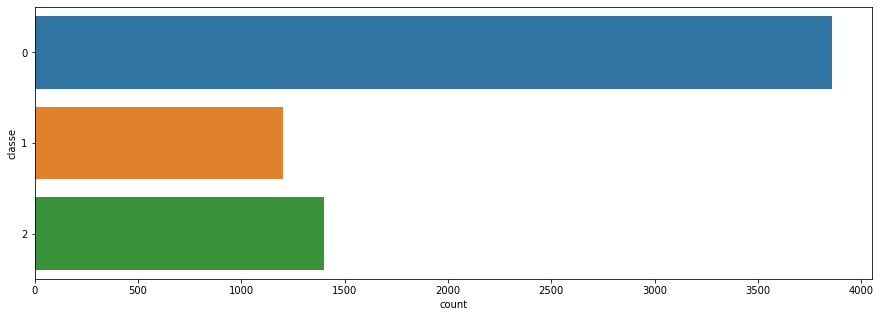

classe
0    3857
Name: classe, dtype: int64
classe
1    1204
Name: classe, dtype: int64
classe
2    1399
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data12)
plt.show()
print(data12.loc[data12.classe==0].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==1].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==2].groupby('classe')["classe"].count())

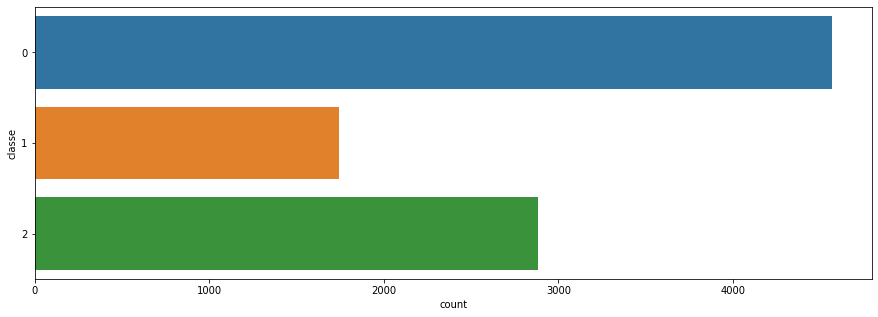

classe
0    4565
Name: classe, dtype: int64
classe
1    1746
Name: classe, dtype: int64
classe
2    2885
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data34)
plt.show()
print(data34.loc[data34.classe==0].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==1].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==2].groupby('classe')["classe"].count())

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [ ]:
training_size=int(len(Nsentences)*0.8)   #Experimenting setup

training_sentences = Nsentences[0:training_size]
testing_sentences = Nsentences[training_size:]
training_labels = Nlables[0:training_size]
testing_labels = Nlables[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
vocab_size

39925

In [ ]:
len(word_index)

39924

In [ ]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

##########

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

##########

Nsentences5=data5["sentences"]
Nlabels5=data5["classe"]

training_size5=int(len(Nsentences5)*0.8)

testing_sentences5 = Nsentences34[training_size5:]
testing_labels5 = Nlabels34[training_size5:]

In [ ]:
max_length12=count_words(max(testing_sentences12,key=count_words))
max_length12

206

In [ ]:
max_length34=count_words(max(testing_sentences34,key=count_words))
max_length34

29

In [ ]:
max_length5=count_words(max(testing_sentences5,key=count_words))
max_length5

52

###The Maximum length in the new data is less than 207, so we can padd them without losing information.

In [ ]:
testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences5 = tokenizer.texts_to_sequences(testing_sentences5)
testing_padded5 = pad_sequences(testing_sequences5, maxlen=max_length, padding='post', truncating='post')

#Modelling

##For The First Model

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=24,activation='relu'),
                                   tf.keras.layers.Dense(units=3, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 207, 16)           638800    
                                                                 
 conv1d_2 (Conv1D)           (None, 203, 128)          10368     
                                                                 
 conv1d_3 (Conv1D)           (None, 203, 32)           4128      
                                                                 
 bidirectional_3 (Bidirectio  (None, 203, 64)          16640     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 203, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 203, 32)         

In [ ]:
#For the First Model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)

training_padded = np.asarray(training_padded).astype(np.int)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.int)
testing_labels = np.asarray(testing_labels).astype(np.int)

#training_padded = np.expand_dims(training_padded, axis=1)
training_labels = np.expand_dims(training_labels, axis=1)
#testing_padded = np.expand_dims(testing_padded, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)

history = model.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

129/129 [==============================] - 29s 133ms/step - loss: 0.9498 - accuracy: 0.5093 - val_loss: 0.8640 - val_accuracy: 0.6138
Epoch 2/50
129/129 [==============================] - 15s 118ms/step - loss: 0.6549 - accuracy: 0.7263 - val_loss: 0.5840 - val_accuracy: 0.7558
Epoch 3/50
129/129 [==============================] - 15s 117ms/step - loss: 0.4905 - accuracy: 0.8096 - val_loss: 0.5030 - val_accuracy: 0.7904
Epoch 4/50
129/129 [==============================] - 15s 113ms/step - loss: 0.4127 - accuracy: 0.8456 - val_loss: 0.4841 - val_accuracy: 0.7979
Epoch 5/50
129/129 [==============================] - 16s 121ms/step - loss: 0.3668 - accuracy: 0.8624 - val_loss: 0.4767 - val_accuracy: 0.7964
Epoch 6/50
129/129 [==============================] - 14s 112ms/step - loss: 0.3285 - accuracy: 0.8781 - val_loss: 0.4668 - val_accuracy: 0.7972
Epoch 7/50
129/129 [==============================] - 15s 120ms/step - loss: 0.3044 - accuracy: 0.8854 - val_loss: 0.3666 - val_accuracy: 0.8

In [ ]:
#Epoch 50/50
#129/129 [==============================] - 17s 131ms/step - loss: 0.0800 - accuracy: 0.9551 - val_loss: 0.1488 - val_accuracy: 0.9221
#Epoch 2/2
#129/129 [==============================] - 14s 111ms/step - loss: 0.0793 - accuracy: 0.9576 - val_loss: 0.1594 - val_accuracy: 0.9425

In [ ]:
model.save('Model1Balanced08.h5')

In [ ]:
history = model.fit(training_padded, training_labels, batch_size=128, epochs=2, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/2
129/129 [==============================] - 15s 119ms/step - loss: 0.0821 - accuracy: 0.9550 - val_loss: 0.1520 - val_accuracy: 0.9128
Epoch 2/2
129/129 [==============================] - 14s 111ms/step - loss: 0.0793 - accuracy: 0.9576 - val_loss: 0.1594 - val_accuracy: 0.9425


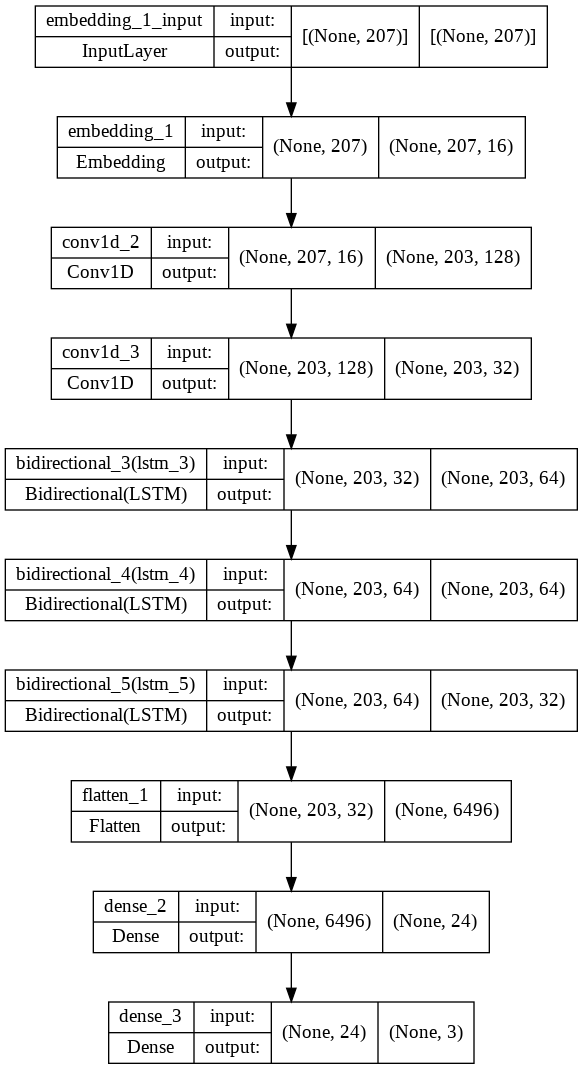

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

pred=model.predict(testing_padded)
rounded_labels1=np.argmax(pred, axis=1).astype(int)
cm = confusion_matrix(testing_labels, rounded_labels1)
print(cm)
print(classification_report(testing_labels, rounded_labels1, labels=[0,1,2]))

[[ 693   18   27]
 [  23 2956  161]
 [   4    3  222]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       738
           1       0.99      0.94      0.97      3140
           2       0.54      0.97      0.69       229

    accuracy                           0.94      4107
   macro avg       0.83      0.95      0.87      4107
weighted avg       0.96      0.94      0.95      4107



In [ ]:
pred12=model.predict(testing_padded12)
rounded_labels112=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels112)
print(cm12)
print(classification_report(testing_labels12, rounded_labels112, labels=[0,1,2]))

[[251 181 155]
 [  9 213  31]
 [  8 186 258]]
              precision    recall  f1-score   support

           0       0.94      0.43      0.59       587
           1       0.37      0.84      0.51       253
           2       0.58      0.57      0.58       452

    accuracy                           0.56      1292
   macro avg       0.63      0.61      0.56      1292
weighted avg       0.70      0.56      0.57      1292



In [ ]:
pred34=model.predict(testing_padded34)
rounded_labels134=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels134)
print(cm34)
print(classification_report(testing_labels34, rounded_labels134, labels=[0,1,2]))

[[  64    6  456]
 [   0    7    0]
 [   0    6 1301]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22       526
           1       0.37      1.00      0.54         7
           2       0.74      1.00      0.85      1307

    accuracy                           0.75      1840
   macro avg       0.70      0.71      0.53      1840
weighted avg       0.81      0.75      0.67      1840



In [ ]:
pred5=model.predict(testing_padded5)
rounded_labels15=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels15)
print(cm5)
print(classification_report(testing_labels5, rounded_labels15, labels=[0,1,2]))

[[2872  138 1025]
 [ 268  507  679]
 [  57  136 2634]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4035
           1       0.65      0.35      0.45      1454
           2       0.61      0.93      0.74      2827

    accuracy                           0.72      8316
   macro avg       0.72      0.66      0.66      8316
weighted avg       0.76      0.72      0.71      8316



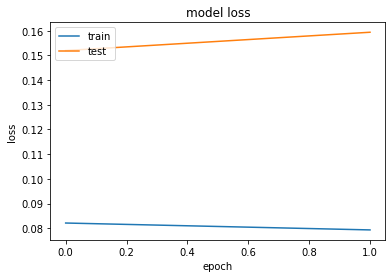

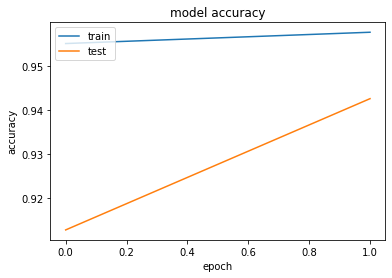

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For the Second Model

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 16)           638800    
                                                                 
 conv1d_4 (Conv1D)           (None, 203, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 24)                3096      
                                                                 
 dense_5 (Dense)             (None, 3)                 75        
                                                      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

history = model2.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
129/129 [==============================] - 2s 13ms/step - loss: 0.9264 - accuracy: 0.5531 - val_loss: 1.0778 - val_accuracy: 0.2552
Epoch 2/50
129/129 [==============================] - 1s 8ms/step - loss: 0.5720 - accuracy: 0.7614 - val_loss: 0.6411 - val_accuracy: 0.7385
Epoch 3/50
129/129 [==============================] - 1s 7ms/step - loss: 0.4306 - accuracy: 0.8329 - val_loss: 0.4982 - val_accuracy: 0.7831
Epoch 4/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3735 - accuracy: 0.8567 - val_loss: 0.4181 - val_accuracy: 0.8412
Epoch 5/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3332 - accuracy: 0.8701 - val_loss: 0.5301 - val_accuracy: 0.7682
Epoch 6/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3037 - accuracy: 0.8819 - val_loss: 0.3145 - val_accuracy: 0.8763
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 0.2734 - accuracy: 0.8946 - val_loss: 0.2322 - val_accuracy: 0.9265
Epoch

In [ ]:
#Epoch 50/50
#129/129 [==============================] - 1s 6ms/step - loss: 0.0928 - accuracy: 0.9549 - val_loss: 0.1237 - val_accuracy: 0.9445

In [ ]:
model.save('Model2Balanced08.h5')

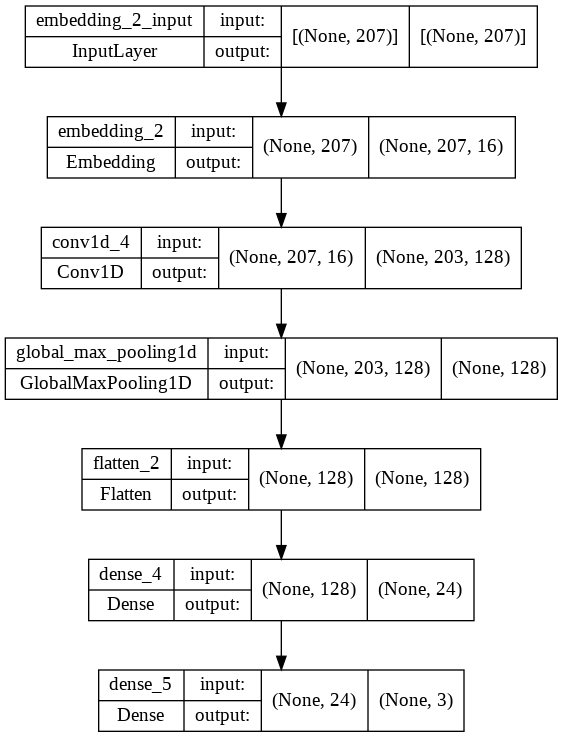

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
pred1=model2.predict(testing_padded)

pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
print(cm)
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

[[ 709    9   20]
 [ 100 2970   70]
 [  23    6  200]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       738
           1       0.99      0.95      0.97      3140
           2       0.69      0.87      0.77       229

    accuracy                           0.94      4107
   macro avg       0.85      0.93      0.88      4107
weighted avg       0.95      0.94      0.95      4107



In [ ]:
pred12=model2.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

[[337 128 122]
 [ 18 217  18]
 [ 41 164 247]]
              precision    recall  f1-score   support

           0       0.85      0.57      0.69       587
           1       0.43      0.86      0.57       253
           2       0.64      0.55      0.59       452

    accuracy                           0.62      1292
   macro avg       0.64      0.66      0.61      1292
weighted avg       0.69      0.62      0.63      1292



In [ ]:
pred34=model2.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

[[  96   13  417]
 [   0    7    0]
 [   4    2 1301]]
              precision    recall  f1-score   support

           0       0.96      0.18      0.31       526
           1       0.32      1.00      0.48         7
           2       0.76      1.00      0.86      1307

    accuracy                           0.76      1840
   macro avg       0.68      0.73      0.55      1840
weighted avg       0.81      0.76      0.70      1840



In [ ]:
pred5=model2.predict(testing_padded5)
rounded_labels25=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels25)
print(cm5)
print(classification_report(testing_labels5, rounded_labels25, labels=[0,1,2]))

[[3059   87  889]
 [ 373  526  555]
 [  92  157 2578]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4035
           1       0.68      0.36      0.47      1454
           2       0.64      0.91      0.75      2827

    accuracy                           0.74      8316
   macro avg       0.73      0.68      0.68      8316
weighted avg       0.76      0.74      0.73      8316



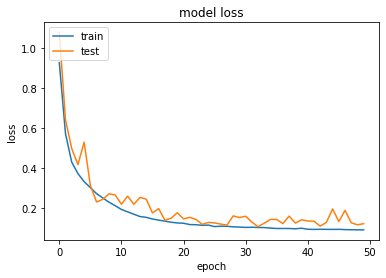

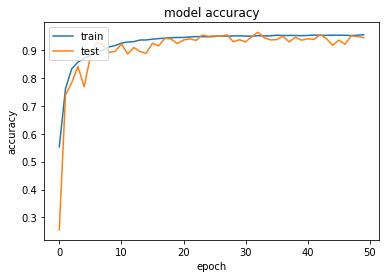

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For The Third Model

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 207, 16)           638800    
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 3)                 75        
                                                                 
Total params: 652,979
Trainable params: 652,979
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model3.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
129/129 [==============================] - 7s 28ms/step - loss: 0.9433 - accuracy: 0.5197 - val_loss: 0.9507 - val_accuracy: 0.2255
Epoch 2/50
129/129 [==============================] - 2s 19ms/step - loss: 0.6660 - accuracy: 0.7041 - val_loss: 0.7213 - val_accuracy: 0.6779
Epoch 3/50
129/129 [==============================] - 2s 19ms/step - loss: 0.5045 - accuracy: 0.8033 - val_loss: 0.6065 - val_accuracy: 0.7485
Epoch 4/50
129/129 [==============================] - 2s 19ms/step - loss: 0.4209 - accuracy: 0.8379 - val_loss: 0.5707 - val_accuracy: 0.7589
Epoch 5/50
129/129 [==============================] - 2s 19ms/step - loss: 0.3784 - accuracy: 0.8546 - val_loss: 0.4680 - val_accuracy: 0.7960
Epoch 6/50
129/129 [==============================] - 2s 19ms/step - loss: 0.3511 - accuracy: 0.8625 - val_loss: 0.3965 - val_accuracy: 0.8503
Epoch 7/50
129/129 [==============================] - 2s 19ms/step - loss: 0.3312 - accuracy: 0.8739 - val_loss: 0.4617 - val_accuracy: 0.8028

In [ ]:
#Epoch 50/50
#129/129 [==============================] - 2s 19ms/step - loss: 0.1259 - accuracy: 0.9401 - val_loss: 0.1715 - val_accuracy: 0.9209

In [ ]:
model.save('Model3Balanced08.h5')

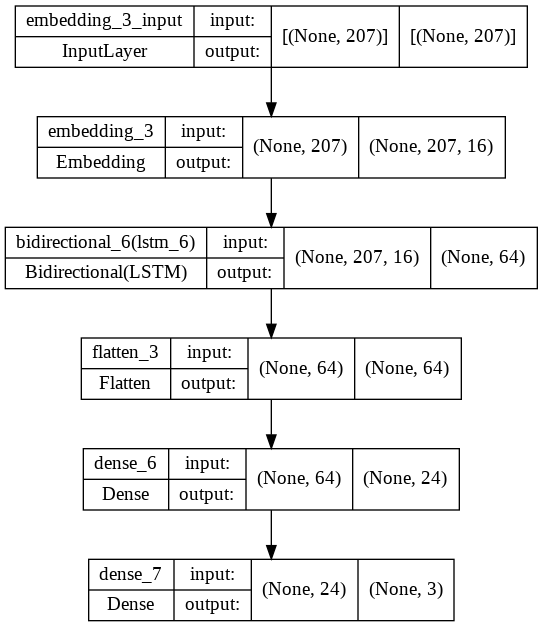

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
pred3=model3.predict(testing_padded)
rounded_labels3=np.argmax(pred3, axis=1).astype(int)
cm2 = confusion_matrix(testing_labels, rounded_labels3)
print(cm2)
print(classification_report(testing_labels, rounded_labels3, labels=[0,1,2]))

[[ 691   15   32]
 [  91 2880  169]
 [  14    4  211]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       738
           1       0.99      0.92      0.95      3140
           2       0.51      0.92      0.66       229

    accuracy                           0.92      4107
   macro avg       0.79      0.92      0.84      4107
weighted avg       0.94      0.92      0.93      4107



In [ ]:
pred12=model3.predict(testing_padded12)
rounded_labels312=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels312)
print(cm12)
print(classification_report(testing_labels12, rounded_labels312, labels=[0,1,2]))

[[301 112 174]
 [ 15 210  28]
 [ 25 145 282]]
              precision    recall  f1-score   support

           0       0.88      0.51      0.65       587
           1       0.45      0.83      0.58       253
           2       0.58      0.62      0.60       452

    accuracy                           0.61      1292
   macro avg       0.64      0.66      0.61      1292
weighted avg       0.69      0.61      0.62      1292



In [ ]:
pred34=model3.predict(testing_padded34)
rounded_labels334=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels334)
print(cm34)
print(classification_report(testing_labels34, rounded_labels334, labels=[0,1,2]))

[[  85   20  421]
 [   0    7    0]
 [   4    2 1301]]
              precision    recall  f1-score   support

           0       0.96      0.16      0.28       526
           1       0.24      1.00      0.39         7
           2       0.76      1.00      0.86      1307

    accuracy                           0.76      1840
   macro avg       0.65      0.72      0.51      1840
weighted avg       0.81      0.76      0.69      1840



In [ ]:
pred5=model3.predict(testing_padded5)
rounded_labels35=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels35)
print(cm5)
print(classification_report(testing_labels5, rounded_labels35, labels=[0,1,2]))

[[2967   89  979]
 [ 311  520  623]
 [  79  153 2595]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      4035
           1       0.68      0.36      0.47      1454
           2       0.62      0.92      0.74      2827

    accuracy                           0.73      8316
   macro avg       0.73      0.67      0.67      8316
weighted avg       0.76      0.73      0.72      8316



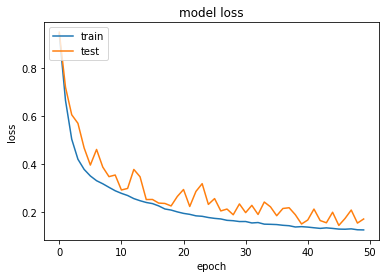

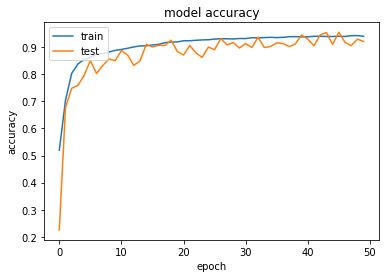

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Conclusion
###The accuracy for the three models is 58% yet the complexity varies. The first model has 690 579 trainale parameters which makes it the most complex amongs the three of them with the second having 618 083 trainable parameters and the third having 618 739 trainable parameters.
###After giving the problem a first look, we can suspect that:
* This is a deep Learning Problem where we need more data and a bigger model so we can track the pattern and better the model's accuracy
* Te model is not getting the pattern in the data well so this can be due to some data imbalence 
* We need to further explore our data and to create a bigger model

#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling